In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

import os
import tensorflow as tf

In [2]:
def show_image(image_data):
    with open('sample.jpg', 'wb') as f:
        f.write(image_data)
    img = mpimg.imread('sample.jpg')
    imgplot = plt.imshow(img)
    plt.show()
    os.remove('sample.jpg')

In [5]:
filename_queue = tf.train.string_input_producer(["cats_vs_dogs/cats_vs_dogs_train_00001-of-00020.tfrecord"],)
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)   #返回文件名和文件

features = tf.parse_single_example(serialized_example,
    features={
        'image/class/label': tf.FixedLenFeature([], tf.int64),
        'image/height': tf.FixedLenFeature([], tf.int64),
        'image/width': tf.FixedLenFeature([], tf.int64),
        'image/encoded' : tf.FixedLenFeature([], tf.string),
    })  #取出包含image和label的feature对象

image = tf.decode_raw(features['image/encoded'], tf.int8)
label = tf.cast(features['image/class/label'], tf.int64)

(array([ -1, -40,  -1, ...,  63,  -1, -39], dtype=int8), 1)


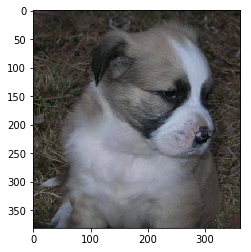

(array([ -1, -40,  -1, ..., 127,  -1, -39], dtype=int8), 0)


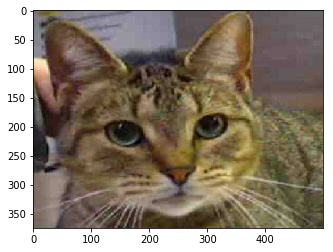

(array([ -1, -40,  -1, ...,  15,  -1, -39], dtype=int8), 1)


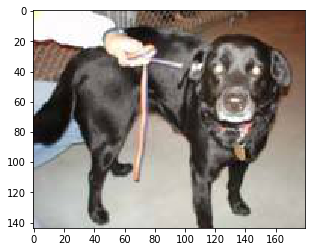

In [6]:
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    for i in range(3):
        payload, l = sess.run([image, label])
        print(payload, l)
        show_image(payload)

    coord.request_stop()
    coord.join(threads)